<a href="https://colab.research.google.com/github/Sanjayca/Product-Classification/blob/main/Product_Classification__ABC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let's import the libraries required for the analysis
import pandas as pd # Pandas used for Data analysis, Data importing, exporting etc
import numpy as np  # NumPy is used for mathematical operatons  
import seaborn as sns
!pip install inventorize3  # Install this package since it is not available in colab
import inventorize3 as inv  # import the inventorize3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for inventorize3: filename=inventorize3-0.0.1-py3-none-any.whl size=15596 sha256=a6ec6ee6e78f55580ca5638fe04159a37c76b23e564f71c5a808d8821d5fc2ae
  Stored in directory: /root/.cache/pip/wheels/7f/7c/7e/b7bd0d41c96fbbf10d2dbaea830d2950ac2dd5d1284d2022a5
Successfully built inventorize3


In [ ]:

# Lets use the e-commerce dataset from kaggle- below is the link for dataset.  
url= 'kaggle datasets download -d carrie1/ecommerce-data'
# Download the dataset form Kaggle & store it in your google drive 

In [ ]:
# import the data
raw_data= pd.read_csv("/content/drive/MyDrive/archive.zip",encoding='unicode_escape')  # If you are using any other IDE( Jypyter notebook,Spyder etc..then specify the path of the file)
# there are some utf-8 (non text) in data so we need to use encoding= 'unicode_escape' 

In [ ]:
# Will check how data looks like
raw_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Dimesnsion of the data
raw_data.shape

(541909, 8)

In [ ]:

# Let us check the types of the columns
raw_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:

# lets see the data period of the data by checking the min &max of InvoivceDate column
raw_data['InvoiceDate']= pd.to_datetime(raw_data['InvoiceDate'])
print(raw_data['InvoiceDate'].min(), raw_data['InvoiceDate'].max())

2010-12-01 08:26:00 2011-12-09 12:50:00


In [ ]:
# Lets clean the data
data= raw_data.drop_duplicates()
data= data.dropna()
data= data[data['Quantity']>0]

In [ ]:
# lets check dimension
data.shape

(392732, 8)

In [ ]:

# Lets dropout unnecessary columns
data1= data[['StockCode','Description','Quantity','UnitPrice']]

In [ ]:
# Add column revenue
data1['revenue']=data1['Quantity']*data1['UnitPrice']

<ipython-input-11-5e32b1000d25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['revenue']=data1['Quantity']*data1['UnitPrice']


In [ ]:
data1.head()

,StockCode,Description,Quantity,UnitPrice,revenue
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,71053,WHITE METAL LANTERN,6,3.39,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [ ]:
# Lets summarize the data for SKU's ( Per SKU Total Quantity & Total Revenue)
data2= data1.groupby(['StockCode','Description']).agg(Volume=('Quantity',np.sum),Revenue=('revenue',np.sum)).reset_index()

In [ ]:
data2.head()

,StockCode,Description,Volume,Revenue
0,10002,INFLATABLE POLITICAL GLOBE,823,699.55
1,10080,GROOVY CACTUS INFLATABLE,291,114.41
2,10120,DOGGY RUBBER,192,40.32
3,10123C,HEARTS WRAPPING TAPE,5,3.25
4,10124A,SPOTS ON RED BOOKCOVER TAPE,16,6.72


In [ ]:
# Lets classify the products to A B & C categories
data_abc= inv.ABC(data2[['Description','Volume']])

In [ ]:

# Lets check the classification
data_abc

,Description,Volume,Percentage,comulative,Category
2602,"PAPER CRAFT , LITTLE BIRDIE",80995,1.567882e-02,0.015679,A
2100,MEDIUM CERAMIC TOP STORAGE JAR,77916,1.508280e-02,0.030762,A
3020,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319,1.051494e-02,0.041277,A
3444,JUMBO BAG RED RETROSPOT,46078,8.919670e-03,0.050196,A
3459,WHITE HANGING HEART T-LIGHT HOLDER,36706,7.105461e-03,0.057302,A
...,...,...,...,...,...
3696,NECKLACE+BRACELET SET PINK DAISY,1,1.935776e-07,0.999999,C
257,SET/3 TALL GLASS CANDLE HOLDER PINK,1,1.935776e-07,0.999999,C
2608,SET OF 3 PINK FLYING DUCKS,1,1.935776e-07,1.000000,C
3686,PINK CRYSTAL GUITAR PHONE CHARM,1,1.935776e-07,1.000000,C


In [ ]:
# let us check the count of Categories
data_abc.Category.value_counts()

C    2143
A     879
B     875
Name: Category, dtype: int64

In [ ]:
data_summary= data_abc.groupby('Category').agg(Count=('Category',np.count_nonzero),Percentage=('Percentage',np.sum)).reset_index()


In [ ]:
data_summary['Percentage']= data_summary['Percentage']*100


In [ ]:
data_summary

,Category,Count,Percentage
0,A,879,79.996597
1,B,875,15.000989
2,C,2143,5.002414


<Axes: xlabel='Category', ylabel='count'>

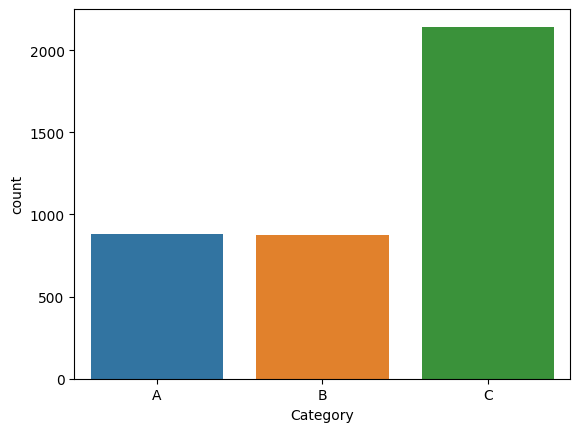

In [ ]:

# Lets plot the graph for count of Categories A, B, C
sns.countplot(x='Category',data=data_abc, label=True )

<Axes: xlabel='Category', ylabel='Volume'>

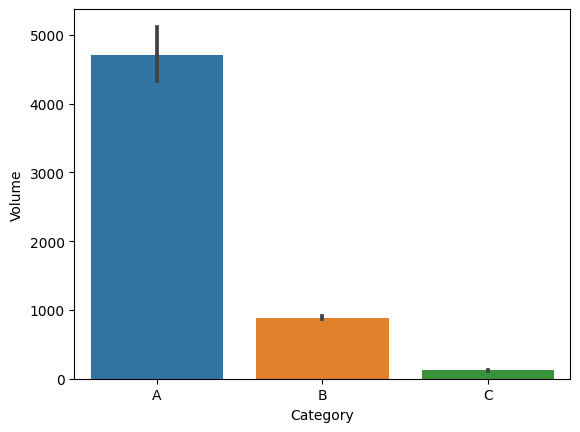

In [ ]:
# Lets plot the graph for volume of sales
sns.barplot(x='Category',y='Volume',data=data_abc)

In [ ]:
data_abc1= inv.ABC(data2[['Description','Revenue']])
# let us check the count of Categories
data_abc1.Category.value_counts()
     

C    2128
B     960
A     809
Name: Category, dtype: int64

In [ ]:
# Lets export the classified inventory data to the CSV
data_abc.to_csv('/content/drive/MyDrive/classified_data.csv')